<a href="https://colab.research.google.com/github/123prassu/deep-learning/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def vectorize_sequences(sequences, dimension=10000):
results = np.zeros((len(sequences), dimension))
for i, sequence in enumerate(sequences):
results[i, sequence] = 1
return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-3-69379fa26c92>, line 2)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Indent the code block within the function
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Ensure the elements are set to 1.0
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [5]:
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
epochs=20,
batch_size=512,
validation_data=(x_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.1700 - loss: 3.5091 - val_accuracy: 0.4626 - val_loss: 2.2430
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4590 - loss: 2.3210 - val_accuracy: 0.6269 - val_loss: 1.6775
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5737 - loss: 1.8332 - val_accuracy: 0.6665 - val_loss: 1.4654
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6291 - loss: 1.5953 - val_accuracy: 0.6932 - val_loss: 1.3601
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6626 - loss: 1.4226 - val_accuracy: 0.6986 - val_loss: 1.2882
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6882 - loss: 1.3063 - val_accuracy: 0.7066 - val_loss: 1.2318
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7006 - loss: 1.2303 - val_accuracy: 0.7150 - val_loss: 1.1939
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7244 - loss: 1.1497 - val_accuracy: 0.7337 - v

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.9995
Test accuracy: 0.7791629433631897


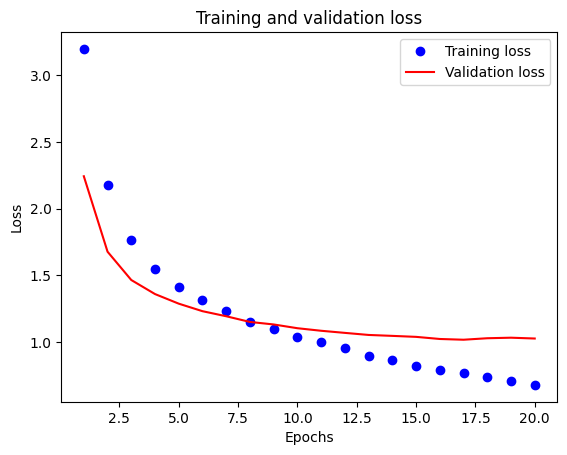

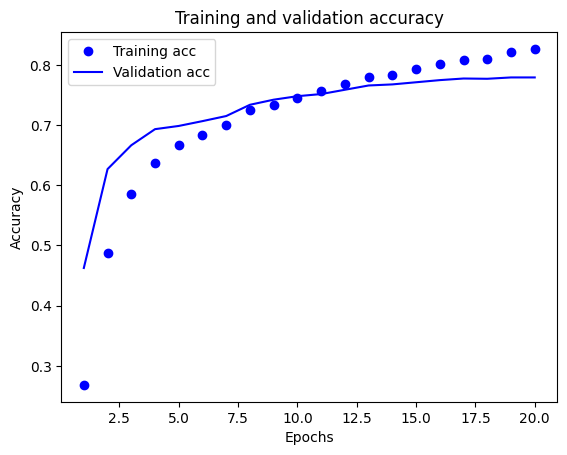

In [9]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
 [[ 8  2  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0  4 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [11]:
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.58      0.83      0.68       105
           2       0.81      0.65      0.72        20
           3       0.92      0.95      0.93       813
           4       0.81      0.89      0.85       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       0.00      0.00      0.00         3
           8       0.66      0.71      0.68        38
           9       0.84      0.64      0.73        25
          10       0.89      0.80      0.84        30
          11       0.54      0.78      0.64        83
          12       0.00      0.00      0.00        13
          13       0.57      0.65      0.61        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.65      0.80      0.72        99
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
